Exploratory Data Analysis

Date 02-16-25
Author: Brenda Fuemmeler
Repository: datafun-06-eda
Purpose: To create a Jupyter notebook to analyze and manipulate data from "tips" dataset.

Introduction: We are looking at a dataset that shows the tips received on meals purchased. Total meals used in the dataset is 244. The variables used are total bill, tip, sex, smoker, day, time, size. With this data we can answer many different queries. Do we serve more males than females?Can we find out if people tip higher for lunch or dinner? As many restaurants in my area no longer allow smoking, I thought this was an interesting piece of data. As we work through the objectives, we'll find answers to these questions and make more observations.

In [12]:
# Imports still go at the top. This is a Python cell.

# Import from external packages
import jupyterlab_widgets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.
from matplotlib.axes import Axes

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

In [13]:
# This cell is Python, so we can write Python code here.......

# Load the dataset into a pandas DataFrame - adjust this process for your custom data
df = sns.load_dataset('tips')

# Inspect first rows of the DataFrame
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [14]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [15]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


We want to see a variety of data views pulled from our tips dataset. Below we will see histograms (bar graphs) with Total Bill, Tip and Size (of party). This will give us a bit of an overview on the types of variations we can look at with the data provided.

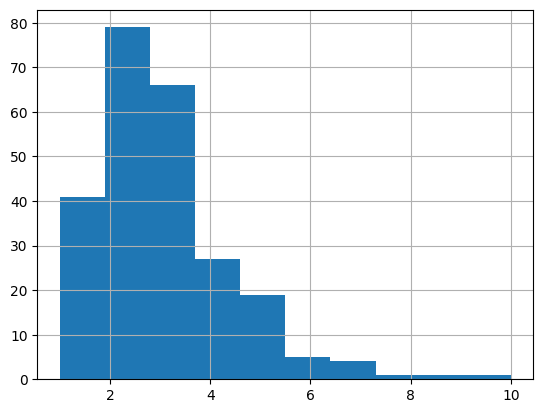

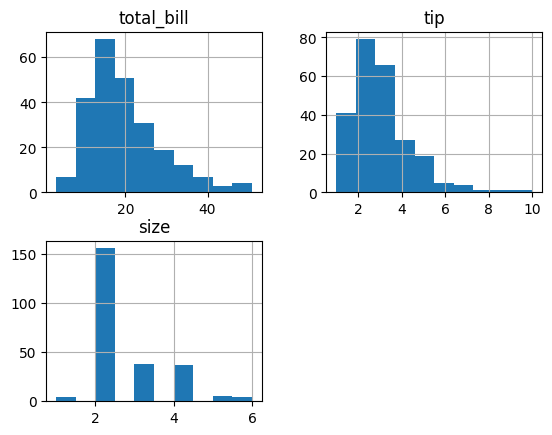

In [16]:
# Inspect histogram by numerical column
df['tip'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

The above histograms show the total bill, tip and size of the party. You can see that as the total bill increases, the tip also increases. The size plot shows that a party of 2 is very common at this restaurant. 

Next we wanted to break down a few pieces of the data and do some comparisons. Again, we are using histograms to show the following distributions of data: Male v Female, Smoker v Non, Count by Day, Lunch v Dinner.

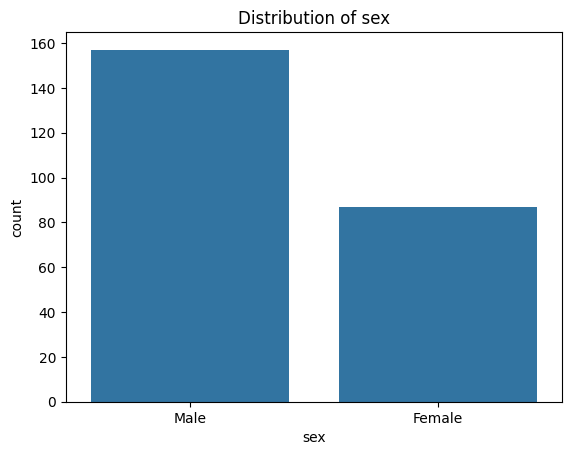

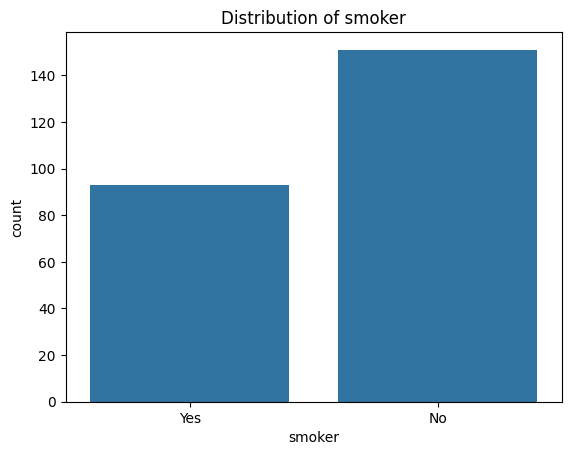

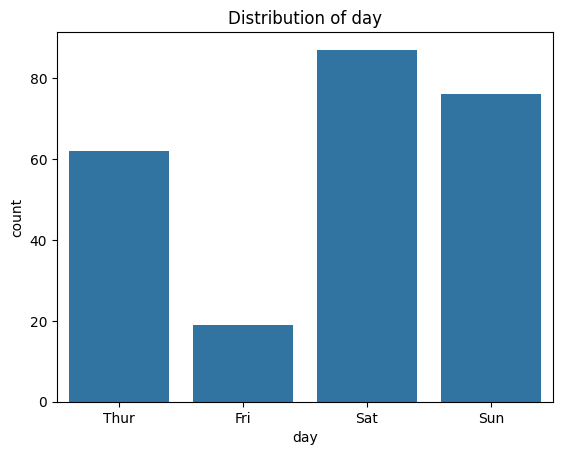

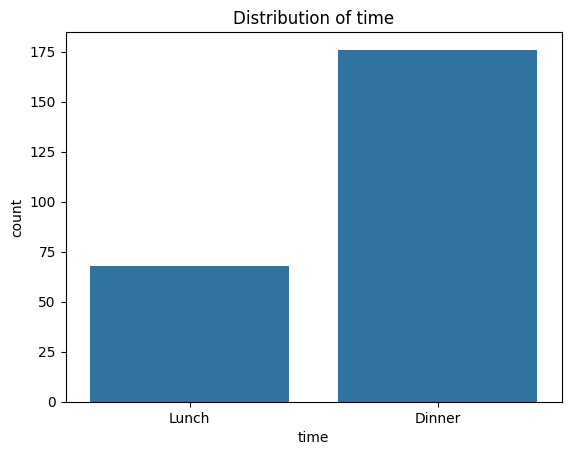

In [17]:
# Inspect value counts by categorical column
df['sex'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

The above histograms give us a picture of a few more points of data. By sex, we can see there are more males than females. Looking at the smokers graph, the larger group of customers were non-smoking. The next plot shows that Saturday & Sunday are the busiest days at the restaurant, with Friday showing a low customer count. The restaurant serves lunch and dinner, with dinner being their busiest shift.

In the next section, I wanted to change the name of a column. To bring this dataset up-to-date, we are renaming the column "sex" to now read "Gender".

In [18]:
# Rename a specific column
df.rename(columns={'sex': 'Gender'}, inplace=True)

print(df)

     total_bill   tip  Gender smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


The goal of the next piece is to add a new column. I wanted to see what percentage of the total bill was the tip. Clearly we are looking at outdated data as we can see several of the tips are way below 2025 standards. As a parent of a waitress, I understand how much they rely on tips. 

In [19]:
# Load dataset
tips = sns.load_dataset("tips")

# Create a new column for tip percentage
tips["tip_pct"] = (tips["tip"] / tips["total_bill"]) * 100

# Display the first few rows
print(tips.head())

   total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


Now we're going to look at the variation in a different way. Using a scatterplot, we are showing the Tip Percentage vs Total Bill and how that is distributed between the lunch and dinner crowds. As the cost of most dinner menu items is higher, we hope to see the tip rise as well. 

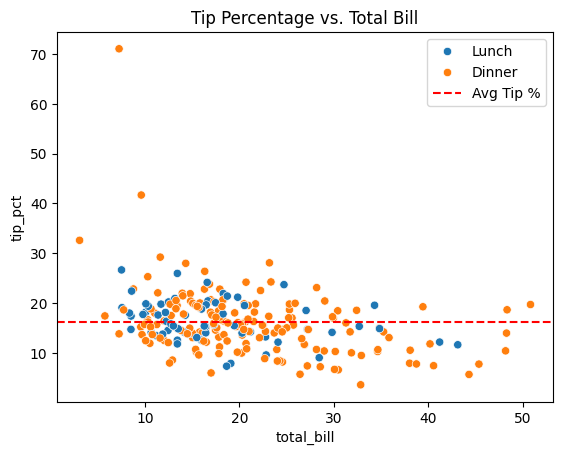

In [20]:
sns.scatterplot(x="total_bill", y="tip_pct", data=tips, hue="time")
plt.axhline(tips["tip_pct"].mean(), color="red", linestyle="--", label="Avg Tip %")
plt.legend()
plt.title("Tip Percentage vs. Total Bill")
plt.show()

First, we wanted to see what percent of the total bill did each party leave as a tip.  Next, we wanted to see the average tip percentage and how those varied across the lunch and dinner shift. We can see that there are only a few outliers where the dinner tip was much higher than average.

Overall, I feel we were able to meet our goals as established in the beginning. Can we see if we serve more males than females? Yes, we do.  Can we see if dinner tips are higher than lunch tips? Yes, they are. 